In [1]:
import pandas as pd
df = pd.read_csv("../AnalysisData/norm.csv")

In [2]:
df1 = df[["beer_norm","spirit_norm","wine_norm"]]
df1.head()

,beer_norm,spirit_norm,wine_norm
0,18.163265,26.938776,11.020408
1,35.714286,0.000000,20.000000
2,19.758065,11.129032,25.161290
3,36.779661,9.661017,7.627119
4,20.816327,26.122449,9.183673


In [3]:
import matplotlib.pyplot as plt
import numpy as np

In [4]:
# standaryzation
for k,j in enumerate(["beer","spirit","wine"]):
        df[j] = (df[j]-df[j].mean())/df[j].std()

In [5]:
## Covariation matrix
Cov_matrix = np.zeros([3,3])
for n,i in enumerate(["beer","spirit","wine"]):
    for k,j in enumerate(["beer","spirit","wine"]):
        Cov_matrix[n,k] = (df[i]*df[j]).mean() - df[i].mean()*df[j].mean()
print(Cov_matrix)

[[0.99444444 0.41612443 0.5046385 ]
 [0.41612443 0.99444444 0.15975436]
 [0.5046385  0.15975436 0.99444444]]


In [6]:
# principal component
import numpy as np
eig_val, eig_vect = np.linalg.eigh(Cov_matrix)

print(eig_vect)


[[-0.74661593  0.05247222 -0.66318272]
 [ 0.38544667 -0.77838607 -0.49552598]
 [ 0.54221353  0.62558916 -0.5609302 ]]


C:\Users\nikos\AppData\Local\Temp\ipykernel_3308\2871867798.py:14: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


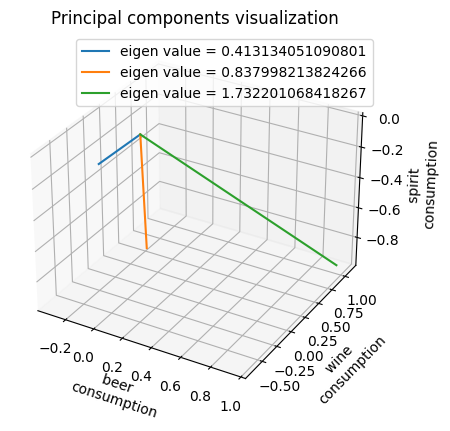

In [7]:
import matplotlib.pyplot as plt
import numpy as np
fig = plt.figure()
ax = plt.axes(projection='3d')

ax.plot([0,eig_vect[0][0]*eig_val[0]],[0,eig_vect[0][1]*eig_val[0]],[0,eig_vect[0][2]*eig_val[0]], label = f"eigen value = {eig_val[0]}")
ax.plot([0,eig_vect[1][0]*eig_val[1]],[0,eig_vect[1][1]*eig_val[1]],[0,eig_vect[1][2]*eig_val[1]], label = f"eigen value = {eig_val[1]}")
ax.plot([0,eig_vect[2][0]*eig_val[2]],[0,eig_vect[2][1]*eig_val[2]],[0,eig_vect[2][2]*eig_val[2]], label = f"eigen value = {eig_val[2]}")
ax.set_xlabel("beer \nconsumption")
ax.set_ylabel("\nwine \nconsumption")
ax.set_zlabel("\nspirit \nconsumption")
ax.set_title("Principal components visualization")
ax.legend()
fig.show()

In [8]:
dataset = np.array(df[["beer","spirit","wine"]])
PCA_dataset = eig_vect @ dataset.T
PCA_dataset = pd.DataFrame(PCA_dataset.T,columns=["first_component","second_component","third_component"])
PCA_dataset.head()
PCA_dataset.to_csv("../AnalysisData/PCA.csv")
eigen_vect = pd.DataFrame(eig_vect, columns=["beer","spirit","wine"])
eigen_vect["eigen value"] = eig_val
eigen_vect.to_csv("../AnalysisData/eigen_vectors_values.csv")